# Reading Dataset

In [229]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
folder = 'drive/MyDrive/Neural-Network/HW1/Q4_Dataset'
df = pd.read_csv("%s/CarPrice_Assignment.csv" % folder)
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetyp

# Counting Nan

In [230]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Creating CompanyName

In [231]:
df['CompanyName'] = df['CarName'].apply(lambda X:X.split(' ')[0])
df = df.drop(['CarName','symboling','car_ID'], axis = 1)
df = df.replace('alfa-romero','alfa-romeo')
df = df.replace('maxda','mazda')
df = df.replace('Nissan','nissan')
df = df.replace('porcshce','porsche')
df = df.replace('toyouta','toyota')
df = df.replace('vokswagen','volkswagen')
df = df.replace('vw','volkswagen')

# Categorical to Numerical

In [232]:
df = pd.get_dummies(df)

# Correlation Matrix

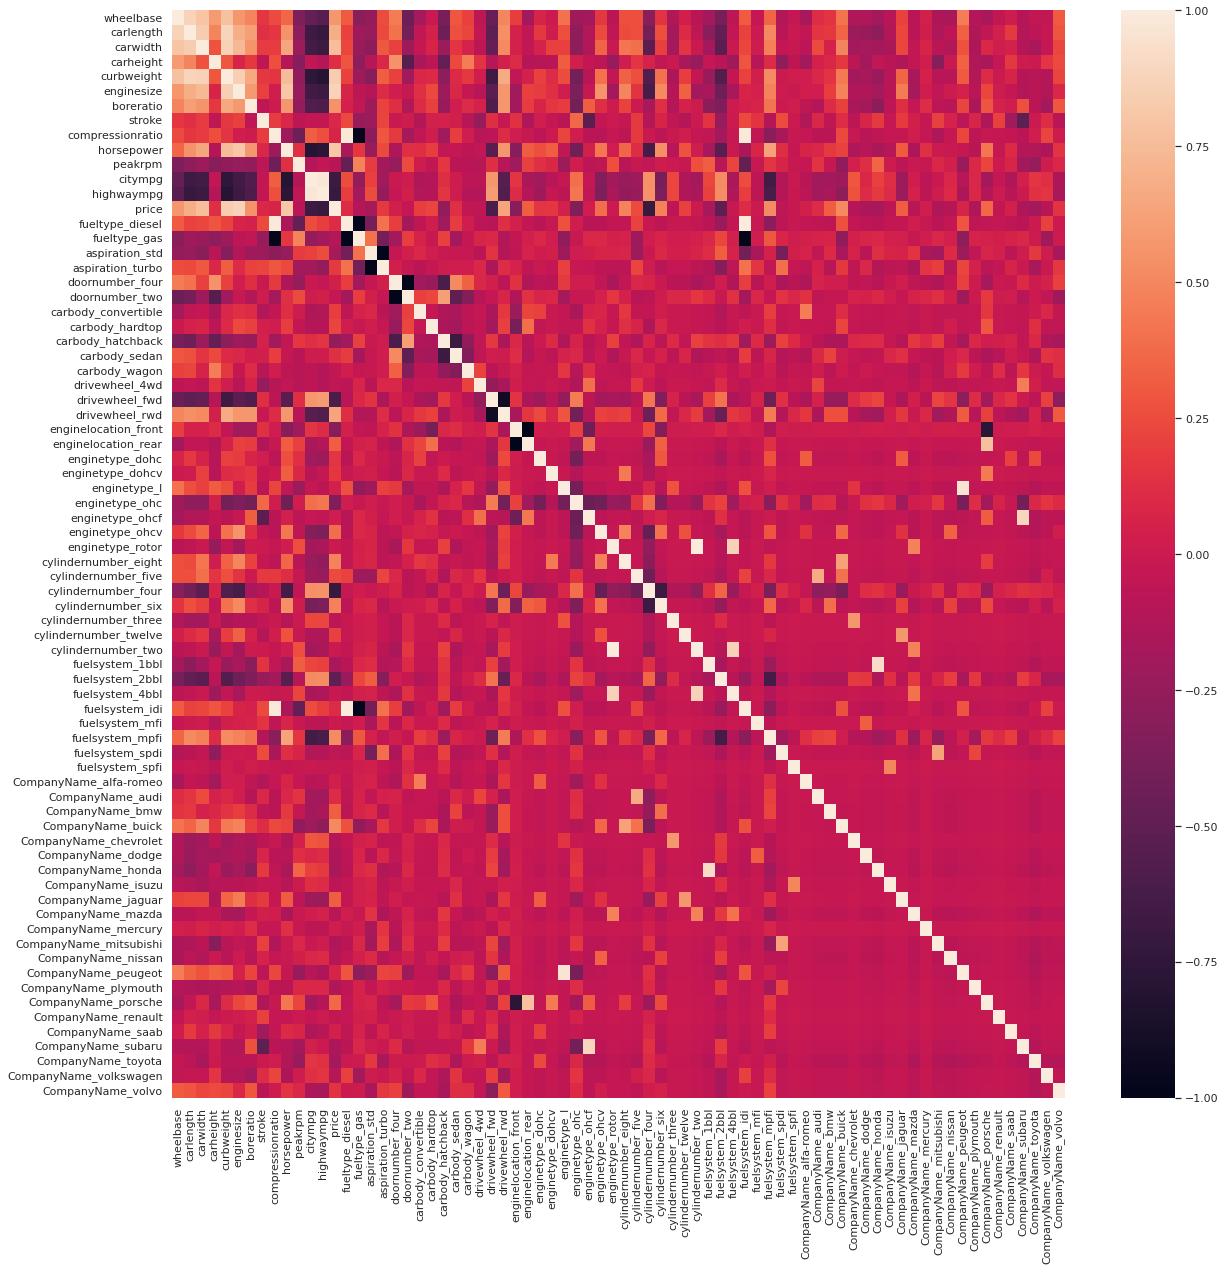

enginesize 0.8741448025245117


In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
mat = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(mat)
plt.show()

import numpy as np
price_corr = np.abs(mat['price'].drop('price'))
most_corr_name = price_corr.keys()[np.argmax(price_corr)]
most_corr_val = price_corr.max()
print(most_corr_name, most_corr_val)

# Price Distribution and Price per Engine Size

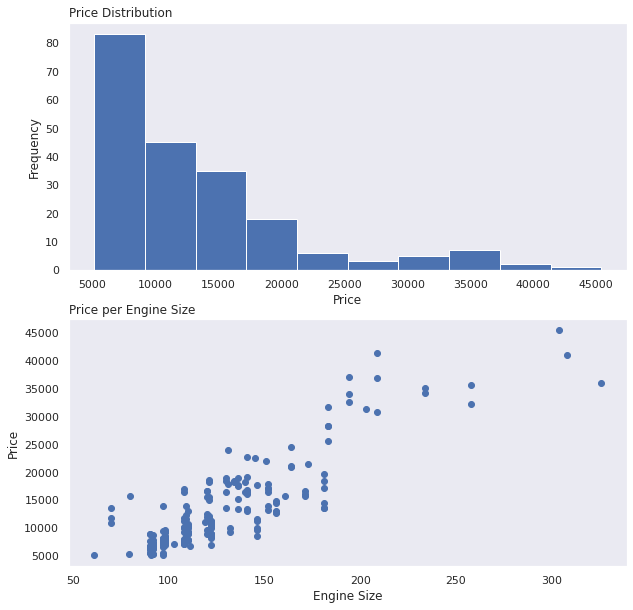

In [234]:
fig , axs = plt.subplots(2,1)
fig.set_size_inches(10,10)

axs[0].hist(df['price'])
axs[0].set_title('Price Distribution', loc='left')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')
axs[0].grid(False)

axs[1].scatter(df['enginesize'],df['price'])
axs[1].set_title('Price per Engine Size', loc='left')
axs[1].set_xlabel('Engine Size')
axs[1].set_ylabel('Price')
axs[1].grid(False)

plt.show()


# Splitting Train and Test Data

In [235]:
from sklearn.model_selection import train_test_split
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

# MinMaxScaler

In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# MLP Models

## Importing

In [237]:
from keras import Input
from keras.layers import Dense
from keras import Sequential
from keras.metrics import MeanSquaredError
from keras import backend as K
import random
import tensorflow as tf

## Creating Model 1

In [238]:
model1 = Sequential(
    [
        Input(shape = (73,)),
        Dense(256, activation='relu'),
        Dense(1, activation='relu')
    ]
)
model1.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_235 (Dense)           (None, 256)               18944     
                                                                 
 dense_236 (Dense)           (None, 1)                 257       
                                                                 
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


## Creating Model 2

In [239]:
model2 = Sequential(
    [
        Input(shape = (73,)),
        Dense(256, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu')
    ]
)
model2.summary()

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_237 (Dense)           (None, 256)               18944     
                                                                 
 dense_238 (Dense)           (None, 16)                4112      
                                                                 
 dense_239 (Dense)           (None, 1)                 17        
                                                                 
Total params: 23,073
Trainable params: 23,073
Non-trainable params: 0
_________________________________________________________________


## Creating Model 3

In [240]:
model3 = Sequential(
    [
        Input(shape = (73,)),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu')
    ]
)
model3.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_240 (Dense)           (None, 256)               18944     
                                                                 
 dense_241 (Dense)           (None, 64)                16448     
                                                                 
 dense_242 (Dense)           (None, 16)                1040      
                                                                 
 dense_243 (Dense)           (None, 1)                 17        
                                                                 
Total params: 36,449
Trainable params: 36,449
Non-trainable params: 0
_________________________________________________________________


## Optimizers and Loss Functions
Here we use 2 Optimizers (Adam and RMSprop) and 2 Loss functions (Mean Squared Error and Mean Squared Logarithmic Error)

### Adam
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. the method is computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters.

### RMSprop
The gist of RMSprop is to Maintain a moving (discounted) average of the square of gradients and Divide the gradient by the root of this average. This implementation of RMSprop uses plain momentum, not Nesterov momentum. The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance.

### Mean Squared Error
Computes the mean of squares of errors between labels and predictions.
loss = square(y_true - y_pred)

### Mean Squared Logarithmic Error
Computes the mean squared logarithmic error between y_true & y_pred.
loss = square(log(y_true + 1.) - log(y_pred + 1.))

## R2 Score Defenition
The coefficient R^2 is defined as (1 - u/v), where u is the regression sum of squares ((y_true - y_pred) ** 2).sum() and v is the residual sum of squares ((y_true - y_true.mean()) ** 2).sum().

In [241]:
def R2_score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [242]:
optimizer = 'adam'
loss_function = 'mean_squared_error'
epochs = 10
fitteds = []
batch_size = 2
metric = R2_score

model1.compile(optimizer=optimizer, loss=loss_function, metrics=[metric])
fitteds.append(model1.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs))

Epoch 1/10
70/70 [==============================] - 1s 7ms/step - loss: 214268736.0000 - R2_score: -22047537233920.0000 - val_loss: 304108128.0000 - val_R2_score: -114929189257216.0000
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 213403760.0000 - R2_score: -7663147548672.0000 - val_loss: 302487136.0000 - val_R2_score: -114072947261440.0000
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 211520880.0000 - R2_score: -47550530846720.0000 - val_loss: 299637024.0000 - val_R2_score: -112559575269376.0000
Epoch 4/10
70/70 [==============================] - 0s 3ms/step - loss: 208567360.0000 - R2_score: -47894551855104.0000 - val_loss: 295536800.0000 - val_R2_score: -110395675115520.0000
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 204537808.0000 - R2_score: -171287322296320.0000 - val_loss: 290241792.0000 - val_R2_score: -107596681838592.0000
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 199

In [243]:
model2.compile(optimizer=optimizer, loss=loss_function, metrics=[metric])
fitteds.append(model2.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs))

Epoch 1/10
70/70 [==============================] - 1s 5ms/step - loss: 214008080.0000 - R2_score: -11224428314624.0000 - val_loss: 302904256.0000 - val_R2_score: -114280229765120.0000
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 209436480.0000 - R2_score: -7374774468608.0000 - val_loss: 291528992.0000 - val_R2_score: -108223235358720.0000
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 192389568.0000 - R2_score: -46238636441600.0000 - val_loss: 262231776.0000 - val_R2_score: -92698329481216.0000
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 159492064.0000 - R2_score: -1567983140864.0000 - val_loss: 213922544.0000 - val_R2_score: -67322194690048.0000
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 117146680.0000 - R2_score: -19936395132928.0000 - val_loss: 161372128.0000 - val_R2_score: -39646931189760.0000
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 80457920

In [244]:
model3.compile(optimizer=optimizer, loss=loss_function, metrics=[metric])
fitteds.append(model3.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs))

Epoch 1/10
70/70 [==============================] - 1s 5ms/step - loss: 213420720.0000 - R2_score: -15793754472448.0000 - val_loss: 299188640.0000 - val_R2_score: -112219744370688.0000
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 184228736.0000 - R2_score: -7700098842624.0000 - val_loss: 207656896.0000 - val_R2_score: -63633862164480.0000
Epoch 3/10
70/70 [==============================] - 0s 3ms/step - loss: 74838368.0000 - R2_score: -61901762560.0000 - val_loss: 82499192.0000 - val_R2_score: -1045096103936.0000
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 43419856.0000 - R2_score: -17589176320.0000 - val_loss: 70372216.0000 - val_R2_score: -448440795136.0000
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 35942260.0000 - R2_score: -1653578924032.0000 - val_loss: 57699860.0000 - val_R2_score: -19027943424.0000
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 29689590.0000 - R2_score: -

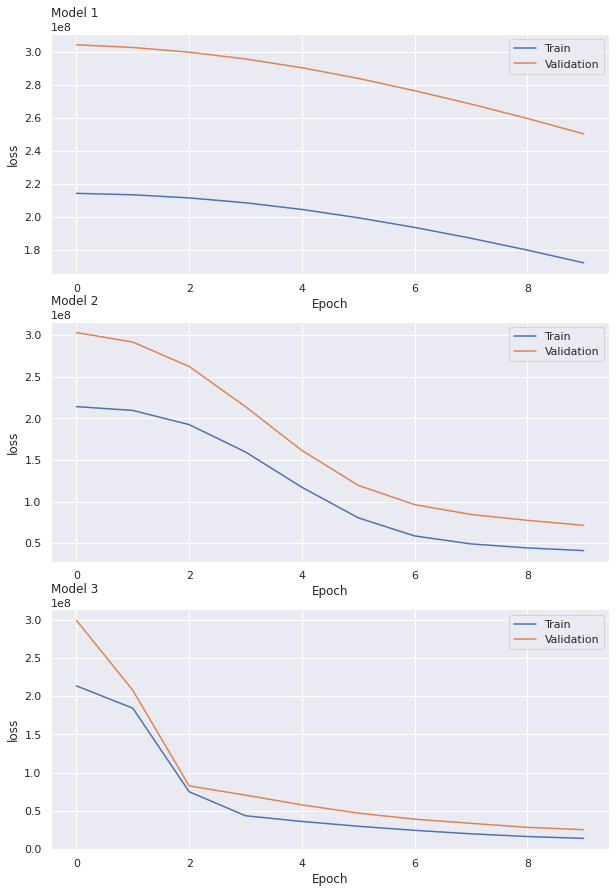

In [245]:
def plot(fitteds):
  fig , axs = plt.subplots(len(fitteds),1)
  fig.set_size_inches(10,5*len(fitteds))
  for i in range(len(fitteds)):
    axs[i].plot(fitteds[i].history['loss'])
    axs[i].plot(fitteds[i].history['val_loss'])
    axs[i].set_title('Model %d' % (i+1), loc='left')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('loss')
    axs[i].legend(['Train', 'Validation'], loc='upper right')
  plt.show()

plot(fitteds)

In [246]:
model4 = Sequential(
    [
        Input(shape = (73,)),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu')
    ]
)

model4.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=[metric])
fitteds = []
fitteds.append(model4.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs))

Epoch 1/10
70/70 [==============================] - 1s 5ms/step - loss: 51.6990 - R2_score: -4359531266048.0000 - val_loss: 30.4665 - val_R2_score: -114406419595264.0000
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 20.4797 - R2_score: -11123456737280.0000 - val_loss: 14.8453 - val_R2_score: -110941723164672.0000
Epoch 3/10
70/70 [==============================] - 0s 5ms/step - loss: 10.8451 - R2_score: -4580792860672.0000 - val_loss: 8.8367 - val_R2_score: -104948901609472.0000
Epoch 4/10
70/70 [==============================] - 0s 4ms/step - loss: 6.6596 - R2_score: -5119487770624.0000 - val_loss: 5.7790 - val_R2_score: -97143016652800.0000
Epoch 5/10
70/70 [==============================] - 0s 3ms/step - loss: 4.3377 - R2_score: -17298032164864.0000 - val_loss: 3.8774 - val_R2_score: -87547472510976.0000
Epoch 6/10
70/70 [==============================] - 0s 4ms/step - loss: 2.8664 - R2_score: -4747036721152.0000 - val_loss: 2.6766 - val_R2_score: -77023116

In [247]:
model5 = Sequential(
    [
        Input(shape = (73,)),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu')
    ]
)

model5.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=[metric])
fitteds.append(model5.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs))

Epoch 1/10
70/70 [==============================] - 1s 5ms/step - loss: 212547888.0000 - R2_score: -30465536819200.0000 - val_loss: 296160032.0000 - val_R2_score: -110899553632256.0000
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 191556496.0000 - R2_score: -24099273310208.0000 - val_loss: 249643504.0000 - val_R2_score: -86758767198208.0000
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 136124544.0000 - R2_score: -3104825671680.0000 - val_loss: 165100752.0000 - val_R2_score: -42430653005824.0000
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 74067080.0000 - R2_score: -912856317952.0000 - val_loss: 101824960.0000 - val_R2_score: -10129693999104.0000
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 48189036.0000 - R2_score: -769048969216.0000 - val_loss: 78399304.0000 - val_R2_score: -1434559578112.0000
Epoch 6/10
70/70 [==============================] - 0s 2ms/step - loss: 42059392.0000 - 

In [248]:
model6 = Sequential(
    [
        Input(shape = (73,)),
        Dense(256, activation='relu'),
        Dense(64, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu')
    ]
)

model6.compile(optimizer='RMSprop', loss='mean_squared_logarithmic_error', metrics=[metric])
fitteds.append(model6.fit(x_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs))

Epoch 1/10
70/70 [==============================] - 1s 4ms/step - loss: 53.6166 - R2_score: -142289464721408.0000 - val_loss: 33.3010 - val_R2_score: -114577874354176.0000
Epoch 2/10
70/70 [==============================] - 0s 3ms/step - loss: 22.2278 - R2_score: -46650928136192.0000 - val_loss: 14.9911 - val_R2_score: -110999243849728.0000
Epoch 3/10
70/70 [==============================] - 0s 2ms/step - loss: 9.7969 - R2_score: -8785057284096.0000 - val_loss: 6.7330 - val_R2_score: -100171304140800.0000
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 4.1503 - R2_score: -35360293781504.0000 - val_loss: 2.8011 - val_R2_score: -78436974460928.0000
Epoch 5/10
70/70 [==============================] - 0s 2ms/step - loss: 1.5582 - R2_score: -36521037824.0000 - val_loss: 1.0620 - val_R2_score: -47915275911168.0000
Epoch 6/10
70/70 [==============================] - 0s 3ms/step - loss: 0.5220 - R2_score: -1331210240.0000 - val_loss: 0.4325 - val_R2_score: -198753050951

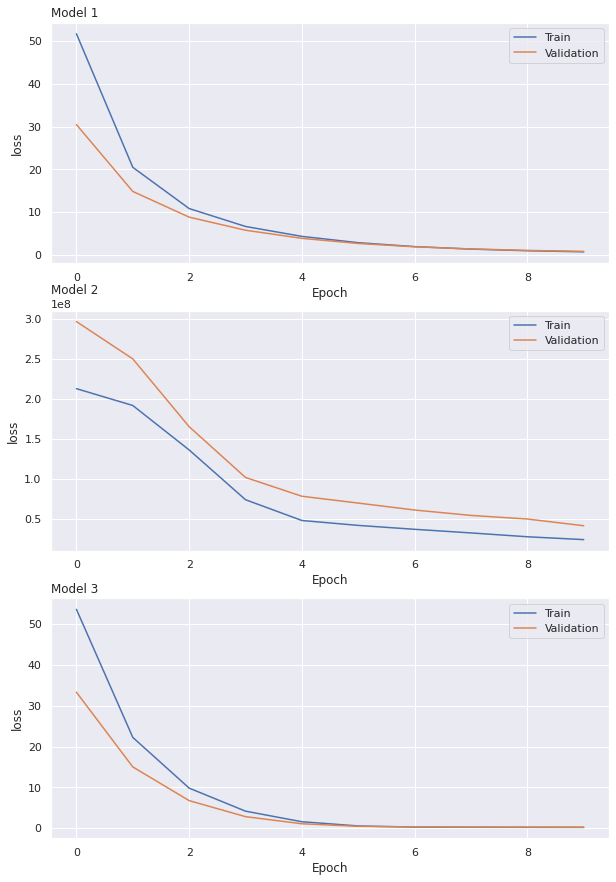

In [249]:
plot(fitteds)

In [250]:
def predict(i):
  return model3.predict([x_test[i:i+1]])

In [251]:
randomlist = random.sample(range(0, len(x_test)), 5)

for i in randomlist:
  y_predict = predict(i)
  print("predicted  = %d" % y_predict)
  print("actual     = %d" % y_test[i:i+1])
  print("difference = %d" % abs(y_predict - int(y_test[i:i+1])))

1/1 [==============================] - 0s 64ms/step
predicted  = 21573
actual     = 28248
difference = 6674
1/1 [==============================] - 0s 25ms/step
predicted  = 18175
actual     = 13415
difference = 4760
1/1 [==============================] - 0s 19ms/step
predicted  = 16848
actual     = 18280
difference = 1431
1/1 [==============================] - 0s 18ms/step
predicted  = 6088
actual     = 6488
difference = 399
1/1 [==============================] - 0s 21ms/step
predicted  = 7096
actual     = 6692
difference = 404
